# TASK 1: 

In [2]:
#Importing all the necessarry libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
customer = pd.read_csv('customer.csv')
product = pd.read_csv('product.csv')
transaction = pd.read_csv('transactions.csv')

In [4]:
#Firstlook of customer data set 
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
#Firstlook of product data set 
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
#Firstlook of transaction data set 
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


- Shape of all 3 datasets 

In [7]:

print("Shape of customer data set is",customer.shape)
print("Shape of product data set is",product.shape)
print("Shape of transactions data set is",transaction.shape)

Shape of customer data set is (200, 4)
Shape of product data set is (100, 4)
Shape of transactions data set is (1000, 7)


- Checking for the columns present in the dataset 

In [8]:

columns_in_customer = customer.columns
columns_in_product = product.columns
columns_in_transaction =  transaction.columns

print(f"Column present in customer table is: {columns_in_customer}\n")
print(f"Column present in product table is: {columns_in_product}\n")
print(f"Column present in transaction table is: {columns_in_transaction}")



Column present in customer table is: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

Column present in product table is: Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

Column present in transaction table is: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


- Below is the column representation of information regarding 3 dataset at 3 diffrent cells

In [9]:
print("Customer DataFrame Info:")
print(customer.info())


Customer DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [10]:
print("Product DataFrame Info:")
print(product.info())


Product DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [11]:

print("Transaction DataFrame Info:")
print(transaction.info())

Transaction DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


- Checking null values across all 3 dataset

In [12]:

print("Null values in customer dataset are represented as below:")
print(customer.isnull().sum())


Null values in customer dataset are represented as below:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [13]:
print("Null values in product ataset are represented as below:")
print(product.isnull().sum())


Null values in product ataset are represented as below:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [14]:
print("Null values in transactions ataset are represented as below:")
print(transaction.isnull().sum())


Null values in transactions ataset are represented as below:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [15]:
#Duplicate values in the datset
print(customer.duplicated().sum())
print(product.duplicated().sum())
print(transaction.duplicated().sum())

0
0
0


- Data type conversion for better analysis


In [16]:
#Converting datatype of "TransactionDate" from transaction table and "SignupDate" from customer to datetime 

transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])

In [28]:
# Converting some values to float 
transaction['TotalValue'] = pd.to_numeric(transaction['TotalValue'], errors='coerce')
transactions = transaction.dropna(subset=['TotalValue'])


# Data Analysis of entire dataset and Insights for further refrence

- Region wise distribution of customer

C:\Users\bhavi\AppData\Local\Temp\ipykernel_8824\2422729260.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( y='Region',data=customer, palette='viridis')


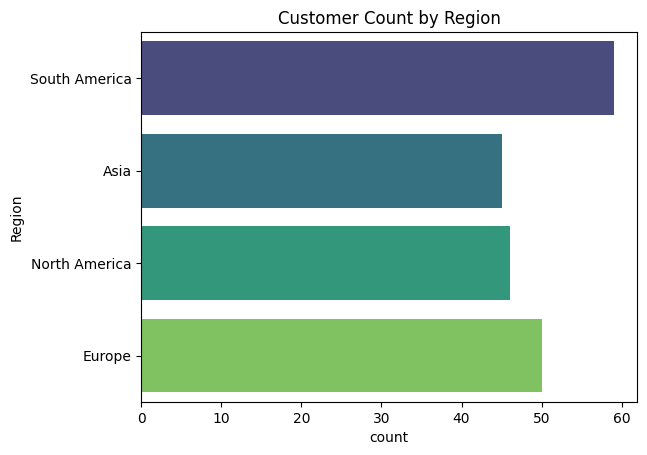

In [29]:
sns.countplot( y='Region',data=customer, palette='viridis')
plt.title('Customer Count by Region')
plt.show()

* Analyze signup date trends

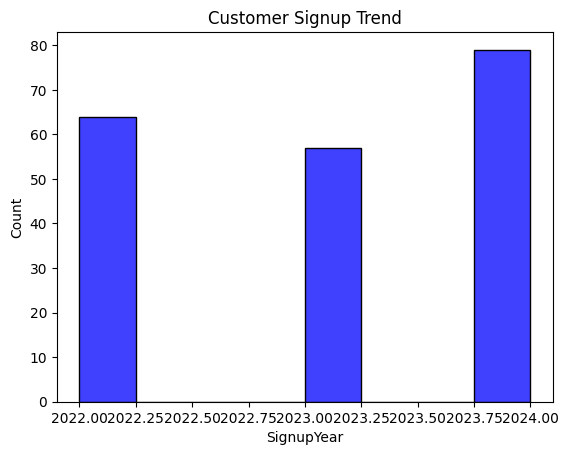

In [34]:
customer['SignupYear'] = customer['SignupDate'].dt.year
sns.histplot(customer['SignupYear'], bins=8, kde=False, color='blue')
plt.title('Customer Signup Trend')
plt.show()

- Most common categories

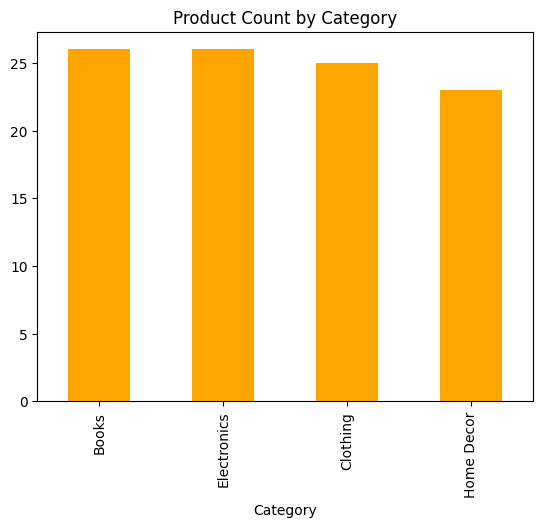

In [35]:
product_counts = product['Category'].value_counts()
product_counts.plot(kind='bar', color='orange')
plt.title('Product Count by Category')
plt.show()

- Price Distriution

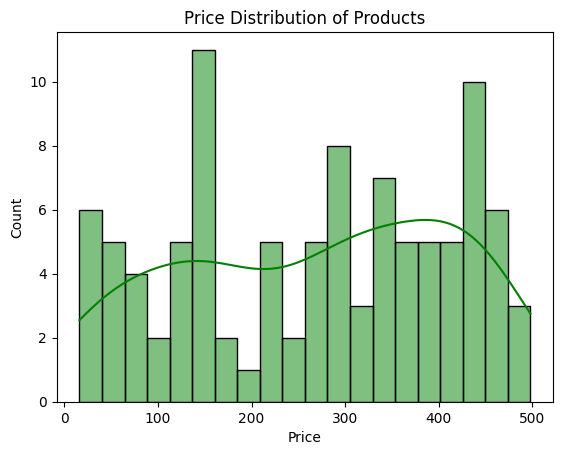

In [36]:
sns.histplot(product['Price'], bins=20, kde=True, color='green')
plt.title('Price Distribution of Products')
plt.show()


- Transaction over time:

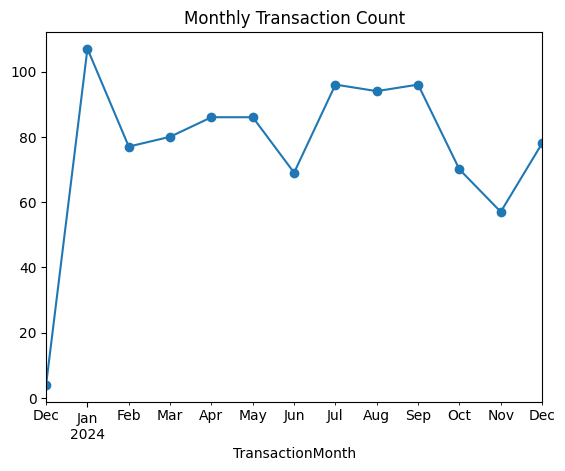

In [37]:
transaction['TransactionMonth'] = transaction['TransactionDate'].dt.to_period('M')
transaction.groupby('TransactionMonth').size().plot(kind='line', marker='o')
plt.title('Monthly Transaction Count')
plt.show()

- Top product by sales

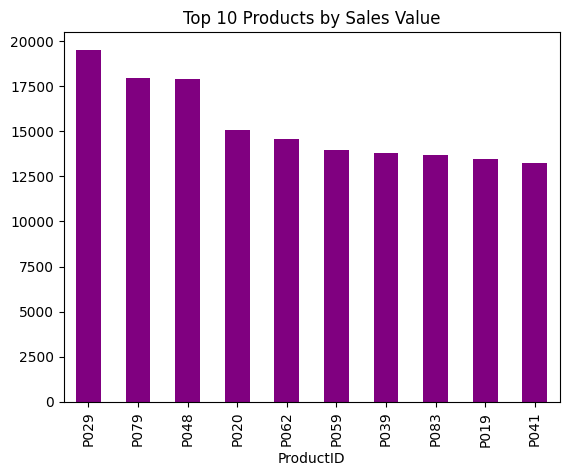

In [38]:
top_products = transaction.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Sales Value')
plt.show()


# Multivariate Analysis

- Correlation Heatmap for Transactions:

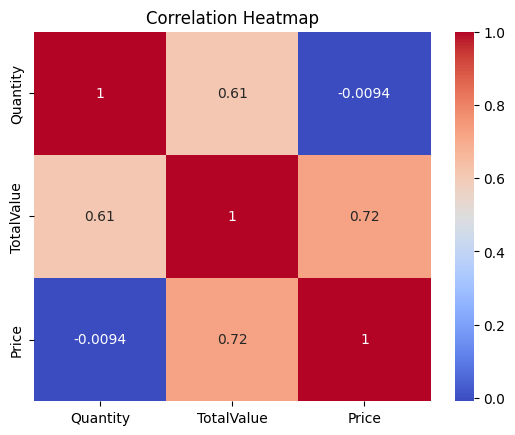

In [39]:
corr_matrix = transaction[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Customer spending by region:

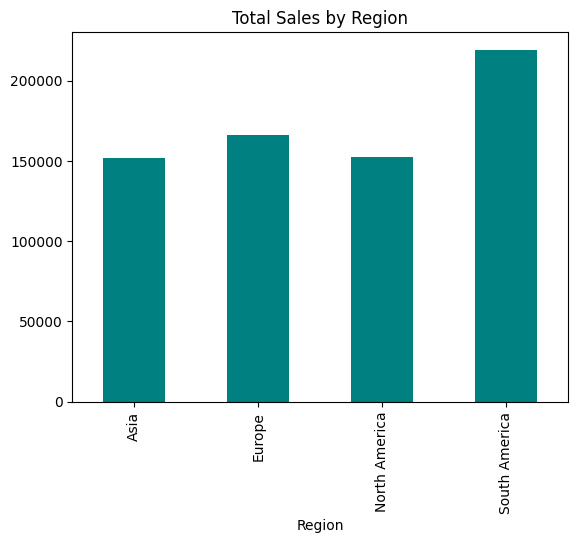

In [40]:
region_sales = transactions.merge(customer, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Region')
plt.show()


- Category-wise revenue contribution

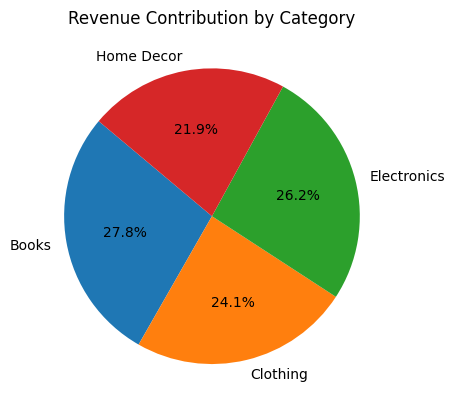

In [41]:
category_sales = transaction.merge(product, on='ProductID').groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Category')
plt.ylabel('')
plt.show()
